In [2]:
import numpy as np
import matplotlib.pyplot as plt

Need to find ra, L, vp, va, T. All of these can be found in any classical mechanics book.

\begin{align}
r_p = \frac{\alpha}{1 + \epsilon} \\
r_a = \frac{\alpha}{1 - \epsilon} \\
\alpha = \frac{\ell^2}{GM}
\end{align}
I can solve for $\alpha$ knowing that $r_p = 6.6 *10^6$m and $\epsilon$ = 0.9656, then use $\alpha$ to find $\ell$ and $r_a$

In [3]:
rp = 6.6e6 # Perigee distance in meters
e = 0.9656
alpha = rp*(1+e)
ra = alpha/(1-e)

G = 6.67408e-11
M = 5.972e24 
L = np.sqrt(alpha*G*M)
print('Distance at apogee {:e}m.\n L = {:e} m^2/s.'.format(ra, L))

Distance at apogee 3.771209e+08m.
 L = 7.190766e+10 m^2/s.


In [4]:
print(alpha)

12972960.0


Then to find the velocity at perigee and apogee we just use the fact that angular momentum must be conserved.
\begin{equation}
\ell = r_p \cdot v_p = r_a \cdot v_a
\end{equation}

In [5]:
vp = L / rp
va = L / ra
print(vp, va)

10895.09966869009 190.67532997707517


The period is found using keplers law
\begin{equation}
T^2 = \frac{4\pi^2}{GM}a^3
\end{equation}
where $a$ is the semi-major axis. This is just $(r_p + r_a) / 2$

In [6]:
a = (rp + ra)/2
T = np.sqrt( (4*np.pi**2) / (G*M) * a**3)
T

836377.81431268

In [7]:
def Gravity(w,t):
    # w = [x, y, vx, vy]
    G = 6.67408e-11
    M = 5.972e24 
    
    vx = w[2]
    vy = w[3]
    theta = np.arctan2(w[1], w[0])
    R2 = (w[0]**2 + w[1]**2)
    
    
    ax = -(G*M)/R2 * np.cos(theta)
    ay = -(G*M)/R2 * np.sin(theta)
    #print(ax,ay)
    
    return np.array([vx, vy, ax, ay])

In [8]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 5/rk2.py'
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    Numerically integrate m first order ODEs using the Runga-Kutta 
      second-order method, where m is an integer greater than zero.

    Inputs
    ----------
    y0:         Array of m initial dependent-variable values
    t0, tf:     Initial and Final independent-variable values
    dt:         Step size for the independent variable
    deriv_func: Function to be numerically integrated

    Output
    ----------
    t:          Array of independent-variable values, one entry for each step
    y:          Array of corresponding dependent-variables values, 
                  first index is step number, 
                  second index is dependent-variable number
    """

    t = np.arange(t0, tf+dt, dt) # starts at t0 and makes steps of size dt
    n_steps = len(t)             # number of steps to get to tf
    m = len(y0)                  # number of dependent variables
    y = np.zeros((n_steps, m))   # create an array to put answers into
    y[0,:] = y0                  # initial condition

    for n in range(n_steps-1):
        # Take a half step
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f

        # Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = y[n,:] + dt*f_star
        
    return t, y

In [9]:
t, w = rk2([rp, 0, 0, vp], 0, 10*T, 10, Gravity)

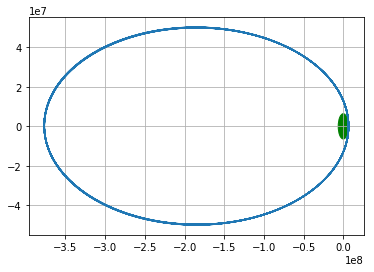

In [10]:
fig, ax = plt.subplots()
ax.plot(w[:,0], w[:,1])
circle1 = plt.Circle((0, 0), 6.4e6, color='g')
ax.add_artist(circle1)
ax.grid()

In [11]:
def KE(v):
    m = 100 # Mass of our satelite
    return 1/2 * m * v**2
def U(r):
    G = 6.67408e-11
    M = 5.972e24 
    m = 100 # Mass of our satelite
    return -G*M*m / r

In [12]:
Vmag = np.sqrt(w[:,2]**2 + w[:,3]**2)
Rmag = np.sqrt(w[:,0]**2 + w[:,1]**2)
R = np.array([w[:,0], w[:,1]])
V = np.array([w[:,2], w[:,3]])
L = []
for n in range(len(t)):
    L.append(np.cross(R[:,n], V[:,n]))

Text(0.5, 0.04, 'Time (sec)')

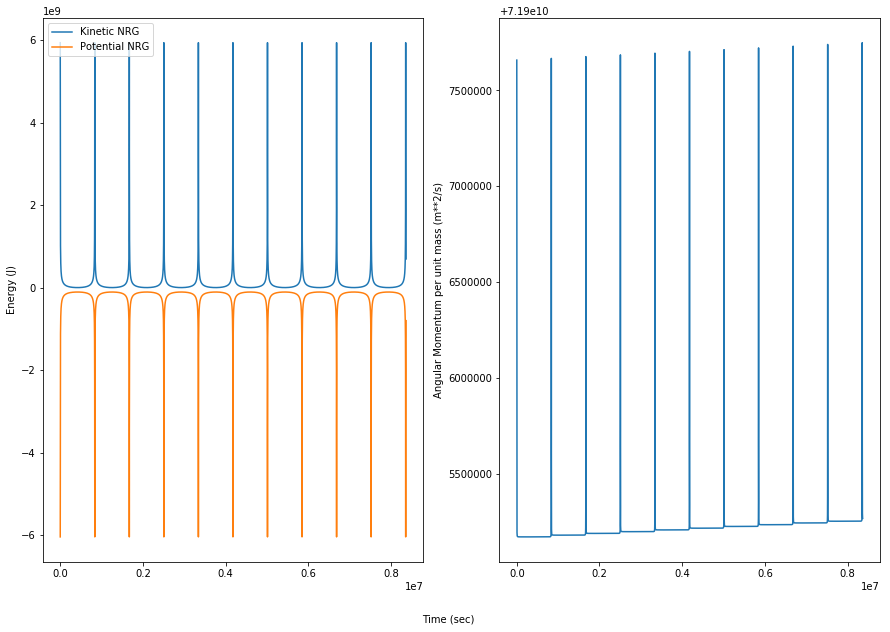

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))
ax1.plot(t, KE(Vmag), label = 'Kinetic NRG')
ax1.plot(t, U(Rmag) , label = 'Potential NRG')
ax1.set_ylabel('Energy (J)')
ax1.legend()

ax2.plot(t, L)
ax2.set_ylabel('Angular Momentum per unit mass (m**2/s)')
fig.text(0.5, 0.04, 'Time (sec)', ha='center')

I know that L should be constant, but it's not. It has the jumps at the start and the end. This is just from numerical errors. The reason it only jumps at those points in that peregee is when we're moving the fastest, as so we need to take smaller and smaller steps in order to be accurate

Text(0.5, 0.04, 'Time (sec)')

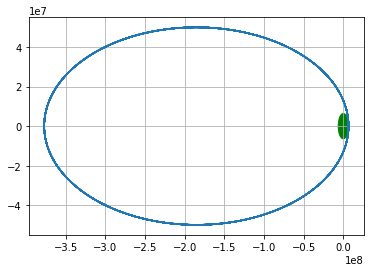

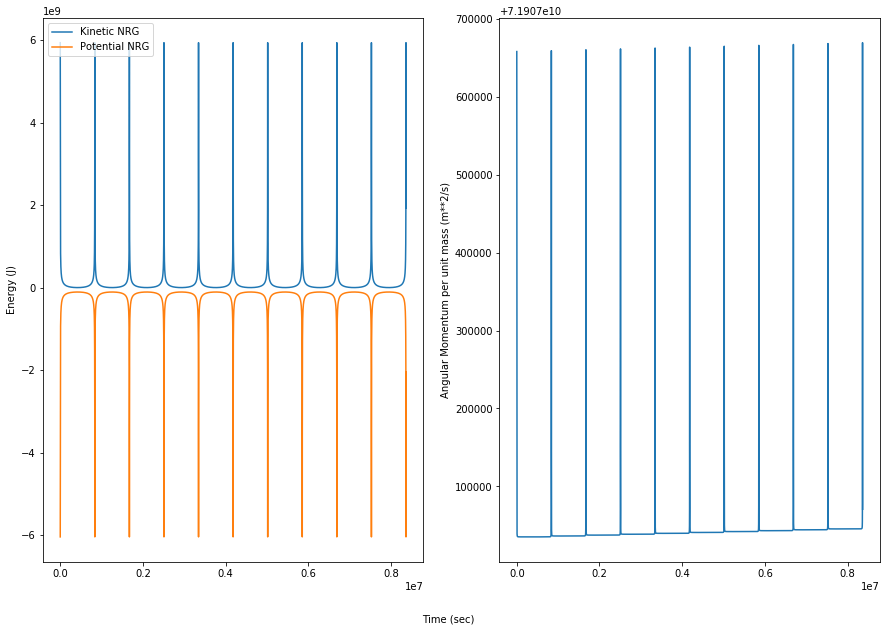

In [15]:
t, w = rk2([rp, 0, 0, vp], 0, 10*T, 5, Gravity)
fig, ax = plt.subplots()
ax.plot(w[:,0], w[:,1])
circle1 = plt.Circle((0, 0), 6.4e6, color='g')
ax.add_artist(circle1)
ax.grid()

Vmag = np.sqrt(w[:,2]**2 + w[:,3]**2)
Rmag = np.sqrt(w[:,0]**2 + w[:,1]**2)
R = np.array([w[:,0], w[:,1]])
V = np.array([w[:,2], w[:,3]])
L = []
for n in range(len(t)):
    L.append(np.cross(R[:,n], V[:,n]))
    
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))
ax1.plot(t, KE(Vmag), label = 'Kinetic NRG')
ax1.plot(t, U(Rmag) , label = 'Potential NRG')
ax1.set_ylabel('Energy (J)')
ax1.legend()

ax2.plot(t, L)
ax2.set_ylabel('Angular Momentum per unit mass (m**2/s)')
fig.text(0.5, 0.04, 'Time (sec)', ha='center')

We see that L is conserved a little better but there's still some error that keeps building up. This can't be avoided. Like we've said before this is just a problem with any numerical methods.

### Now with drag

In [16]:
def Gravity2(w,t):
    # w = [x, y, vx, vy]
    G = 6.67408e-11
    M = 5.972e24
    Re = 6.4e6
    
    vx = w[2]
    vy = w[3]
    theta = np.arctan2(w[1], w[0])
    R = np.sqrt(w[0]**2 + w[1]**2)
    
    if 0 < (R - Re) <= 201e3:
        rho = 1.08e-8
        C_d = 2
        A = 10
        m = 100
        alpha = 1/2 * A * C_d * rho / m
        ax = -(G*M)/R**2 * np.cos(theta) - alpha * np.sqrt(w[2]**2 + w[3]**2)*w[2]
        ay = -(G*M)/R**2 * np.sin(theta) - alpha * np.sqrt(w[2]**2 + w[3]**2)*w[3]
    else:
        ax = -(G*M)/R**2 * np.cos(theta) 
        ay = -(G*M)/R**2 * np.sin(theta)
    #print(ax,ay)
    
    return np.array([vx, vy, ax, ay])

In [17]:
t, w = rk2([rp, 0, 0, vp], 0, 10*T, 10, Gravity2)

<IPython.core.display.Javascript object>


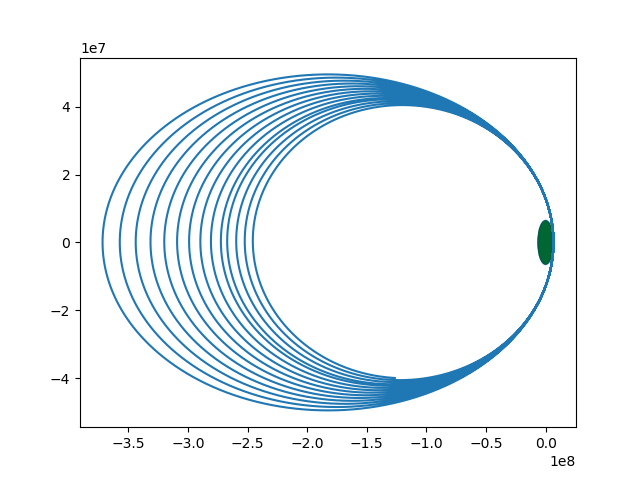

In [21]:
fig, ax = plt.subplots()
ax.plot(w[:,0], w[:,1])
circle1 = plt.Circle((0,0), 6.4e6, color = 'g')
circle2 = plt.Circle((0,0), 6.6e6, color = 'b', alpha = 0.2)
ax.add_artist(circle1)
ax.add_artist(circle2)

In [19]:
def Down_to_Earth(w0, dt):
    Re = 6.4e6
    t0 = 0
    
    R = np.sqrt(w0[0]**2 +  w0[1]**2)
    while (R - Re) > 0:
        t, w = rk2(w0, t0, t0+dt, dt, Gravity2)
        w0 = w[1]
        t0 += dt
        R = np.sqrt(w0[0]**2 + w0[1]**2)
        
    vx0 = w[0,2]
    vy0 = w[0,3]
    v0 = np.sqrt(vx0**2 + vy0**2)
    
    vx1 = w[1,2]
    vy1 = w[1,3]
    v1 = np.sqrt(vx1**2 + vy1**2)
    
    v_ground = (v0 + v1)/2
    t_ground = (t[0]+ t[1])/2
    
    return t_ground, v_ground

In [23]:
TF1, VF1 = Down_to_Earth([rp, 0, 0 ,vp], 10)

In [24]:
# Kinetic Energy in Joules
1/2 * 100 * VF1**2

3094385884.1281743

In [26]:
TF1/T

38.39387469452293

In [27]:
TF1, VF1 = Down_to_Earth([rp, 0, 0 ,vp], 1)

In [30]:
1/2 * 100 * VF1**2, TF1/T

(3095036241.0686107, 40.043688303141835)

It looks like it takes slightly longer to fall to the ground with the smaller steps, and it has just a little bit more energy when it hits. But these differences are a few percent, so it's probably not worth it to have it run for the longer time, when our answer doesn't change by much.